# Analysis code 
## For Zarkali et al. Neuroimaging and plasma marker evidence for white matter macrostructure loss in Parkinson’s disease

Author: Angelika Zarkali

Date last updated: 15th November 2023

## Load libraries and data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.formula.api import ols
import numpy as np

from Demographics import *
# Enable inline plotting
%matplotlib inline

In [2]:
# Load original VIPD dataset
original_S1_data = pd.read_excel(r"C:/Users/Angelika/Dropbox/UCL/02_EXPERIMENTS/03_VIPD_Session3/DATA/CLINICAL/Visit1data_allscanned.xlsx")

## Demographics and clinical scores

In [2]:
### Normality checks

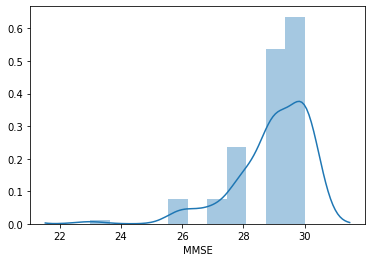

In [8]:
# Visual inspection
### Serially inspect each dependent variable to check distribution across the dataset
Plot = sns.distplot(original_S1_data.MMSE.dropna())

# Change to the df_PD database if want to 

In [18]:
# Shapiro Wilks test looping through all variables
# Original dataset
normal_visit1, non_normal_visit1 = normalityCheck(original_S1_data)
# Export results to a file - using visit 3 as less 
## Normally distributed
normal_file = open('NormallyDistributed_Original.txt', 'w')
for variable in normal_visit1:
    normal_file.write(variable + '\n')
normal_file.close()
## Non normally distributed
non_normal_file = open('NonNormallyDistributed_Original.txt', 'w')
for variable in non_normal_visit1:
    non_normal_file.write(variable + '\n')
non_normal_file.close()

In [19]:
# Shapiro Wilks test looping through all variables
# Visit 3
normal_visit3, non_normal_visit3 = normalityCheck(df_visit3)
# Export results to a file - using visit 3 as less 
## Normally distributed
normal_file = open('NormallyDistributed_S3.txt', 'w')
for variable in normal_visit3:
    normal_file.write(variable + '\n')
normal_file.close()
## Non normally distributed
non_normal_file = open('NonNormallyDistributed_S3.txt', 'w')
for variable in non_normal_visit3:
    non_normal_file.write(variable + '\n')
non_normal_file.close()

### Compare demographics

#### Baseline

In [5]:
# PD LowVis, PD HighVis, Controls
# Baseline Visit

## Declare lists 
catColumns = ['Gender', 'Handedness', 'PD_Side', ]
numColumns = pd.read_csv(r"Columns.txt", header=None)[0].to_list()
ptColumns = pd.read_csv(r"PatientColumns.txt", header=None)[0].to_list()
allColumns = numColumns + ptColumns
## Compare (loop through)
results = groupCompare(allColumns, "MCIOrDementiaOrDeathOrFrailty", original_S1_data, 3)
results = original_S1_data.groupby("MCIOrDementiaOrDeathOrFrailty").std()
results.to_csv("Demographics_Cat.csv")

#### Post Hoc testing for significant variables

In [50]:
# Post hoc tukey test for ANOVA 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
data = original_S1_data
data=data[np.isfinite(data.Dropout)]
variable = data.MCIOrDementiaOrDeathOrFrailty # substitute variable sequentially to test all continuous variables following ANOVA
group= data.S3scan

print(pairwise_tukeyhsd(group, variable))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0933   0.66 -0.3476  0.161  False
     0      2  -0.1694 0.3631  -0.464 0.1252  False
     1      2  -0.0761  0.743 -0.3215 0.1694  False
---------------------------------------------------


In [368]:
# Post hoc dunn for Kruskal Willis
from scikit_posthocs import posthoc_dunn
data = original_S1_data
## returns p-values 
posthoc_dunn(data, val_col="Hallucinations_Session3", group_col="MCIOrDementiaOrDeathOrFrailty")

,0,1,2
0,-1.000000,0.175146,0.059254
1,0.175146,-1.000000,0.365425
2,0.059254,0.365425,-1.000000


### Repeated measures anova for longitudinal differences

In [21]:
###### Build dataframe
data = original_S1_data
data["UPDRS_Session3"] = data["UPDRS.Part_1_2_4_Session3"] + data["UPDRS.Motor_Session3"] # add total score Session 3

###### Select columns
demographics = ["Participant", "Age", "Gender", "PD", "PD_VisPerf", "IntracranialVolume", "YearsofEd", "YrsDiag", "LEDD"]
clinical = ["CogCompS1", "HADSanxiety", "HADSdepression", "Miami", "UPDRS", "UPDRSMotorScoreonly", "MMSE", "MOCA", "WordRec", "GNT", "DigitSpanF", 
            "DigitSpanB", "LogMem_Immediate", "JLO", "Hooper", "LogMem_Delayed", "Stroop_colour_time", "Stroop_word_time", "Stroop_both_time", "FluencyLetter", 
            "FluencyAnimal", "Pelli_Best", "LogMAR_Best"]
clinical_S2 = ["CogCompS2", "HADS.anxiety_Session2", "HADS.depression_Session2", "Hallucinations_Session2", "UPDRS_Session2", "UPDRSMotorScoreOnly_Session2", "MMSE_Session2", "MOCA_Session2", "Word_recognition_Session2", "GNT_Session2", "Digit_Span_Forward_Session2", 
            "Digit_Span_Backward_Session2", "Logical_Memory_Immediate_Session2", "JLO_Session2", "Hooper_Session2", "Logical_Memory_Delayed_Session2", "Stroop_colour_time_Session2", "Stroop_word_time_Session2", "Stroop_both_time_Session2", "Verbal_fluency_letter_Session2", 
            "Verbal_fluency_category_Session2", "Best_Pelli_Robson_Binocular_Session2", "Best_LogMAR_Binocular_Session2"]
clinical_S3 = ["CogCompS3", "HADS_anxiety_Session3", "HADS_depression_Session3", "Hallucinations_Session3", "UPDRS_Session3", "UPDRS.Motor_Session3", "MMSE_Session3", "MOCA_Session3", "Word_recognition_Session3", "GNT_Session3", "Digit_Span_Forward_Session3", 
            "Digit_Span_Backward_Session3", "Logical_Memory_Immediate_Session3", "JLO_Session3", "Hooper_Session3", "Logical_Memory_Delayed_Session3", "Stroop_colour_time_Session3", "Stroop_colour_time_Session3.1", "Stroop_interference_time_Session3", "Verbal_fluency.letter_Session3", 
            "Verbal_fluency.category_Session3", "Best_Pelli_Robson_Binocular_Session3", "Best_LogMAR_Binocular_Session3"]
df_baseline = data[demographics + clinical]
df_baseline["Session"] = 1
df_baseline["Time"] = 0
df_baseline["MCIOrDementiaOrDeathOrFrailty"] = data.MCIOrDementiaOrDeathOrFrailty
df_session2 = data[demographics + clinical_S2]
df_session2["Session"] = 2
df_session2["Time"] = data.Duration /2
df_session2["MCIOrDementiaOrDeathOrFrailty"] = data.MCIOrDementiaOrDeathOrFrailty
df_session2.columns = df_baseline.columns
df_session3 = data[demographics + clinical_S3]
df_session3["Session"] = 3
df_session3["Time"] = data.Duration
df_session3["MCIOrDementiaOrDeathOrFrailty"] = data.MCIOrDementiaOrDeathOrFrailty
df_session3.columns = df_baseline.columns

longDatabase = pd.concat([df_baseline, df_session2, df_session3], axis=0)

In [108]:
import pingouin as pg

# Compute the two-way mixed-design ANOVA
pvals_S2 = []
pvals_S3 = []
tvals_S2 = []
tvals_S3 = []
hedges_S2 = []
hedges_S3 = []
### Loop through all variables
for col in clinical:
    aov = pg.mixed_anova(dv=col, within='Session', between='MCIOrDementiaOrDeathOrFrailty', subject='Participant', data=longDatabase) # fit RM anova
    posthocs = pg.pairwise_ttests(dv=col, within='Session', between='MCIOrDementiaOrDeathOrFrailty', subject='Participant', data=longDatabase) # get posthoc tests
    # Select the session * Group interaction
    # Session 2
    pvals_S2.append(posthocs[(posthocs["Contrast"] == "Session * MCIOrDementiaOrDeathOrFrailty") & (posthocs["Session"] == 2) & (posthocs["A"] == 1)]["p-unc"]).values
    tvals_S2.append(posthocs[(posthocs["Contrast"] == "Session * MCIOrDementiaOrDeathOrFrailty") & (posthocs["Session"] == 2) & (posthocs["A"] == 1)]["T"]).values
    hedges_S2.append(posthocs[(posthocs["Contrast"] == "Session * MCIOrDementiaOrDeathOrFrailty") & (posthocs["Session"] == 2) & (posthocs["A"] == 1)]["hedges"]).values
    # Session 3
    pvals_S3.append(posthocs[(posthocs["Contrast"] == "Session * MCIOrDementiaOrDeathOrFrailty") & (posthocs["Session"] == 3) & (posthocs["A"] == 1)]["p-unc"]).values
    tvals_S3.append(posthocs[(posthocs["Contrast"] == "Session * MCIOrDementiaOrDeathOrFrailty") & (posthocs["Session"] == 3) & (posthocs["A"] == 1)]["T"]).values
    hedges_S3.append(posthocs[(posthocs["Contrast"] == "Session * MCIOrDementiaOrDeathOrFrailty") & (posthocs["Session"] == 3) & (posthocs["A"] == 1)]["hedges"]).values
# Merge to Dataframe and export as csv
outdata = pd.DataFrame(data=np.zeros((len(clinical),0))) 
outdata["Variable"] = clinical
outdata["t_Session2"] = tvals_S2 
outdata["t_Session3"] = tvals_S3
outdata["hedges_Session2"] = hedges_S2
outdata["hedges_Session3"] = hedges_S3
outdata["pvalues_Session2"] = pvals_S2
outdata["pvalues_Session3"] = pvals_S3
outdata.to_csv("RepeatedMeasuresAnova_results.csv")

# Baseline ROIs

In [4]:
fc_S1 = pd.read_csv(r"C:\Users\Angelika\Dropbox\UCL\02_EXPERIMENTS\03_VIPD_Session3\DATA\ROIs\TractSeg\Session1_fc.csv")
fd_S1 = pd.read_excel(r"C:\Users\Angelika\Dropbox\UCL\02_EXPERIMENTS\03_VIPD_Session3\DATA\ROIs\TractSeg\Session1_fd.xlsx")
fdc_S1 = pd.read_excel(r"C:\Users\Angelika\Dropbox\UCL\02_EXPERIMENTS\03_VIPD_Session3\DATA\ROIs\TractSeg\Session1_fdc.xlsx")

In [3]:
columns = ["MCIOrDementiaOrDeathOrFrailty", "PD", "Age", "Gender", "IntracranialVolume", "Duration", "CogCompS1", "CogCompS2", "CogCompS3", 'MOCA', 'MOCA_Session3', 'MOCA_Session2']
clinical = original_S1_data[columns]
clinical["AgeNorm"] = np.abs(clinical.Age - clinical.Age.mean())/clinical.Age.std()
clinical["TIVnorm"] = np.abs(clinical.IntracranialVolume - clinical.IntracranialVolume.mean())/clinical.IntracranialVolume.std()
clinical["TTS"] = np.abs(clinical.Duration - clinical.Duration.mean())/clinical.Duration.std()
# add change in Cognitive Composite Score
clinical["ChangeCogComp"] = clinical.CogCompS1 - clinical.CogCompS3
clinical.ChangeCogComp = np.where(np.isnan(clinical.ChangeCogComp), clinical.CogCompS2 - clinical.CogCompS1, clinical.ChangeCogComp) # exclude the ones where no S3
clinical.ChangeCogComp = np.where(np.isnan(clinical.ChangeCogComp), clinical.CogCompS3 - clinical.CogCompS2, clinical.ChangeCogComp) # one more where there is no S1 score
combined_data = pd.concat([clinical, fc_S1], axis=1)

In [4]:
# Loop through ROIs
data = combined_data[combined_data.PD == 1]
data["groups"] = data.Participant
vc = {"IntracranialVolume": "TIVnorm", "Gender":"C(Gender)" } 
# ROIs = fc_S1.columns.drop("Participant")
ROIs = ["AF_left", "ATR_left", "CC_2", "CC_3", "CC_5", "CC_7", "MLF_right", "OR_left", "T_OCC_left", "T_PREM_left"] ## significant only
# ROIs = fc_S1.columns.drop(["Participant", "MCP", "ICP_left", "ICP_right", "FPT_left", "FPT_right"])

# # Declare empty lists
pvalues = []
coefficients = []
lowerCI = []
upperCI = []
tvalues = []

for roi in ROIs:
    formula = str(roi) + " ~ CogCompS1 + AgeNorm + C(Gender) + TIVnorm"
    mdf = ols(formula, data=data).fit()
    p = mdf.pvalues[1]
    t = mdf.tvalues[1]
    coef = (mdf.conf_int().iloc[1]).mean()
    lower = (mdf.conf_int().iloc[1])[0]
    upper = (mdf.conf_int().iloc[1])[1]
    tvalues.append(t)
    pvalues.append(p)
    coefficients.append(coef)
    lowerCI.append(lower)
    upperCI.append(upper)

# FDR correct the p-values
FDR = sm.stats.multipletests(pvalues, is_sorted=False, alpha=0.05, method="fdr_bh", returnsorted=False)

# Merge to Dataframe and export as csv
outdata = pd.DataFrame(data=np.zeros((len(ROIs),0))) 
outdata["Tract"] = ROIs
outdata["Coef"] = coefficients
outdata["lowerCI"] = lowerCI
outdata["upperCI"] = upperCI
outdata["tValues"] = tvalues
outdata["pValues"] = pvalues
outdata["FDR"] = FDR[1]

# # Get Means for PD dataset and variance
meansData  = combined_data.drop(["Participant"], axis=1)
means_Good = meansData[meansData.PD ==1].groupby("MCIOrDementiaOrDeathOrFrailty").mean()[ROIs].values[0]
means_Bad = meansData[meansData.PD ==1].groupby("MCIOrDementiaOrDeathOrFrailty").mean()[ROIs].values[1]
interval = 1.64*meansData[meansData.PD==1].groupby("MCIOrDementiaOrDeathOrFrailty").std()[ROIs].values[1] / np.sqrt(len(meansData[meansData.MCIOrDementiaOrDeathOrFrailty ==2]))
outdata["Mean_Good"] = means_Good
outdata["Mean_Poor"] = means_Bad
outdata["PoorvsGood_mean"] = (means_Bad - means_Good) / means_Good
outdata["PoorvsGood_lower"] = (means_Bad - interval - means_Good) / means_Good
outdata["PoorvsGood_upper"] = (means_Bad + interval - means_Good) / means_Good
outdata.to_csv("TractSegROIs_FC_CogCombS1_New.csv")

### ROI graph

C:\Users\Angelika\AppData\Local\Temp\ipykernel_7372\1785224981.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y="Tract",x="value", hue="Colour", data=melt_data, palette=palette, ci=None, dodge=False)


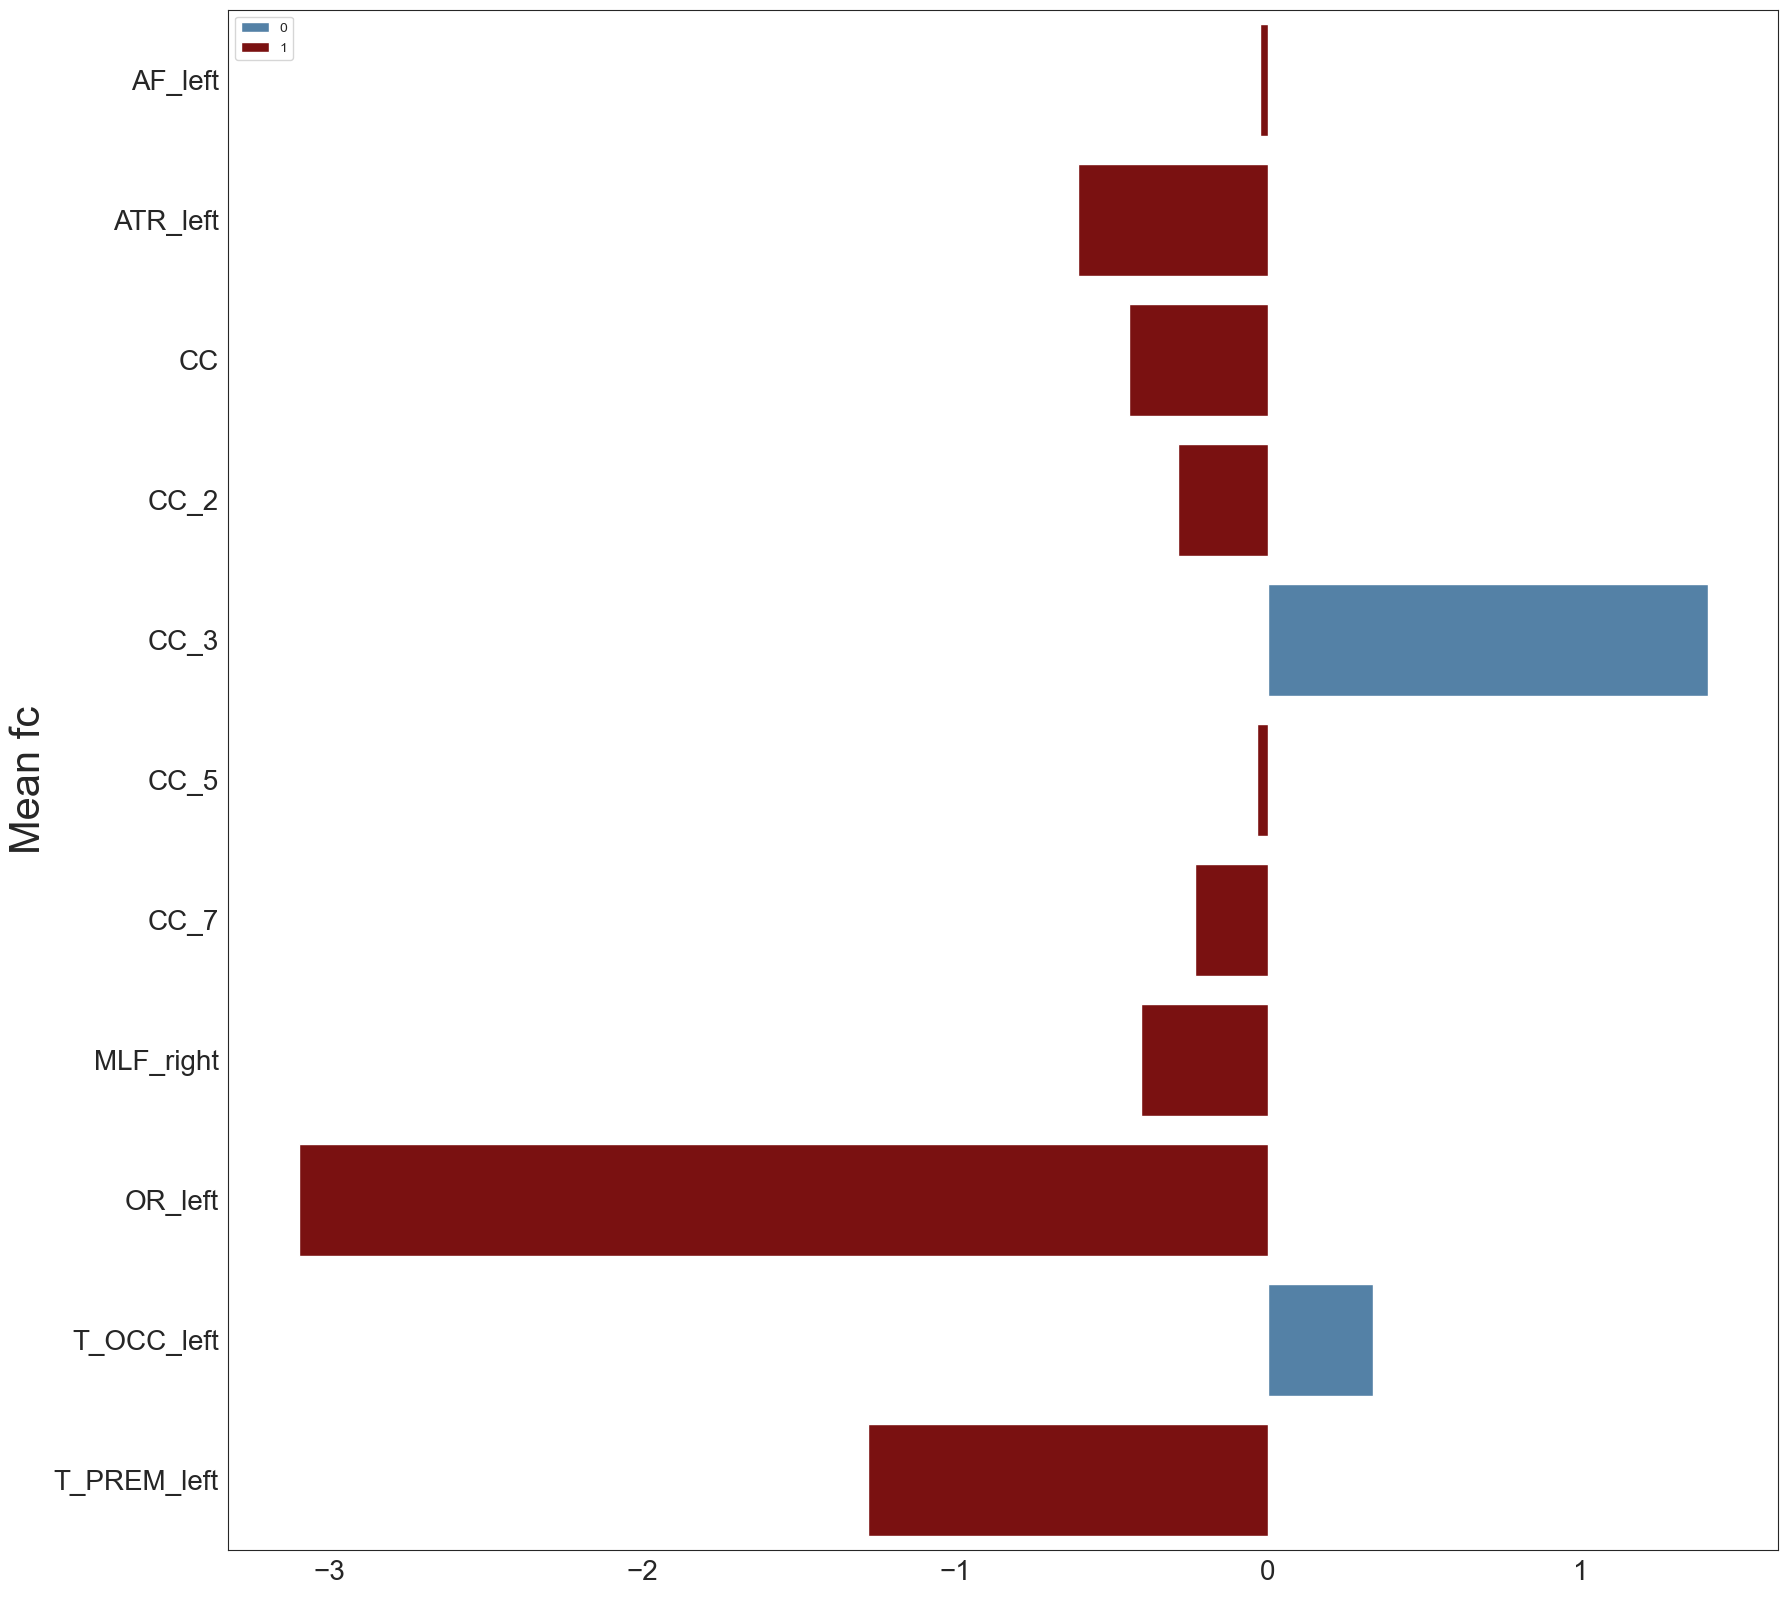

In [32]:
# Set style for the graphs
data = pd.read_csv(r"RESULTS/TractSegROIs_FC_New.csv")
data.Coef = np.where(data.PoorvsGood_mean <0, data.Coef * -1, data.Coef) # assign the sign of the difference
data = data[data.FDR<=0.05]
data["Colour"] = np.where(data.PoorvsGood_mean <0, 1,0)

melt_data = pd.melt(data, id_vars=["Tract", "FDR", "Colour" ],value_vars=["PoorvsGood_mean", "PoorvsGood_lower", "PoorvsGood_upper"])
# melt_data["Colour"] = np.where(melt_data.FDR <=0.05, 1, 0)
# melt_data["Colour"] = np.where(melt_data.value <0 , 1,0)

# colors= ["gray", "darkred"]
colors = ["steelblue", "darkred"]
palette=sns.color_palette(colors)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(20,20))
sns.barplot(y="Tract",x="value", hue="Colour", data=melt_data, palette=palette, ci=None, dodge=False)
#### Make the labels pretty 
# ax.set_xlim(-10, 10)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(" ")
plt.ylabel("Mean fc", fontsize=30)
plt.legend()
## Filename to save output
outname = str("RESULTS/figures/" + "TractSegResults_SigOnly.png")
# Save
plt.savefig(outname, dpi=300)

#### Correlation graph

In [30]:
# fc_template= pd.read_excel(r"C:\Users\Angelika\Dropbox\UCL\02_EXPERIMENTS\03_VIPD_Session3\DATA\ROIs\mean_fc_S1_PoorCognition.xlsx", header=None)
# combined_data["MeanFC"] = fc_template[1]

roi = "CC_2"
cog = "ChangeCogComp"
data = combined_data[combined_data.PD==1]
data = data[np.isfinite(data[cog])]#
# data = data[data[roi] <0.6]
# Set style for the graphs
sns.set_style("white")
fig, ax = plt.subplots(figsize=(20,20))
fig = sns.regplot(x=cog, y=roi, data=data, color="darkgray")
# fig = sns.lmplot(x=cog, y=roi, data=data, hue="MCIOrDementiaOrDeathOrFrailty", palette=palette, height=15, aspect=1)
#### Make the labels pretty 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Combined Cognitive Score Change", fontsize=30)
plt.ylabel("Mean fc Session 1", fontsize=30)
## Filename to save output
# outname = str("RESULTS/figures/" + "CogScoreChange_FC.png")
# Save
plt.savefig(outname, dpi=300)

stats.spearmanr(data[roi], data[cog])

# PLASMA

In [6]:
## FC and Tau
tau = pd.read_excel(r"C:\Users\Angelika\Dropbox\UCL\02_EXPERIMENTS\03_VIPD_Session3\DATA\CLINICAL/Ptau.xlsx")
combined_data["pTau"] = tau.pTau
combined_data["NFL"] = tau.NFL_S2
combined_data["Batch"] = tau.Batch

In [7]:
# Check for batch effect
data = tau
data = data[np.isfinite(data.NFL_S2)]
data = data[np.isfinite(data.Batch)]
model = sm.OLS.from_formula("NFL_S2 ~ C(Batch) + AgeNorm + C(Gender)", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NFL_S2   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 22 Aug 2023   Prob (F-statistic):              0.117
Time:                        15:43:14   Log-Likelihood:                -335.02
No. Observations:                  98   AIC:                             678.0
Df Residuals:                      94   BIC:                             688.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.3472      1.866      6.617      0.000       8.643      16.052
C(Batch)[T.2.0]     2.5031      1.590      1.574      0.119      -0.653       5.660
C(Gender)[T.1]      1.0211      1.568      0.651      0.516      -2.092       4.134
AgeNorm             2.4089      1.432      1.683      0.096      -0.433       5.251
==============================================================================
Omnibus:                       20.577   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.373
Skew:                           1.067   Prob(JB):                     1.88e-06
Kurtosis:                       4.380   Cond. No.                         4.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
data = combined_data[np.isfinite(combined_data.NFL)]
data = data[data.PD ==1]
 
model = sm.OLS.from_formula("NFL ~ MCIOrDementiaOrDeathOrFrailty + AgeNorm + C(Gender)", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NFL   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     2.400
Date:                Tue, 22 Aug 2023   Prob (F-statistic):             0.0736
Time:                        15:43:39   Log-Likelihood:                -291.17
No. Observations:                  87   AIC:                             590.3
Df Residuals:                      83   BIC:                             600.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        10.7196      2.348      4.565      0.000       6.049      15.390
C(Gender)[T.1]                   -0.4648      1.616     -0.288      0.774      -3.679       2.750
MCIOrDementiaOrDeathOrFrailty     4.3777      1.777      2.463      0.016       0.842       7.913
AgeNorm                           0.4864      1.481      0.328      0.744      -2.460       3.433
==============================================================================
Omnibus:                       18.779   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.594
Skew:                           1.055   Prob(JB):                     7.53e-06
Kurtosis:                       4.435   Cond. No.                         7.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Angelika\AppData\Local\Temp\ipykernel_7404\977782962.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x="MCIOrDementiaOrDeathOrFrailty", y="NFL_S2", data=data, alpha=0.3, palette=palette, dodge=False, size=10)


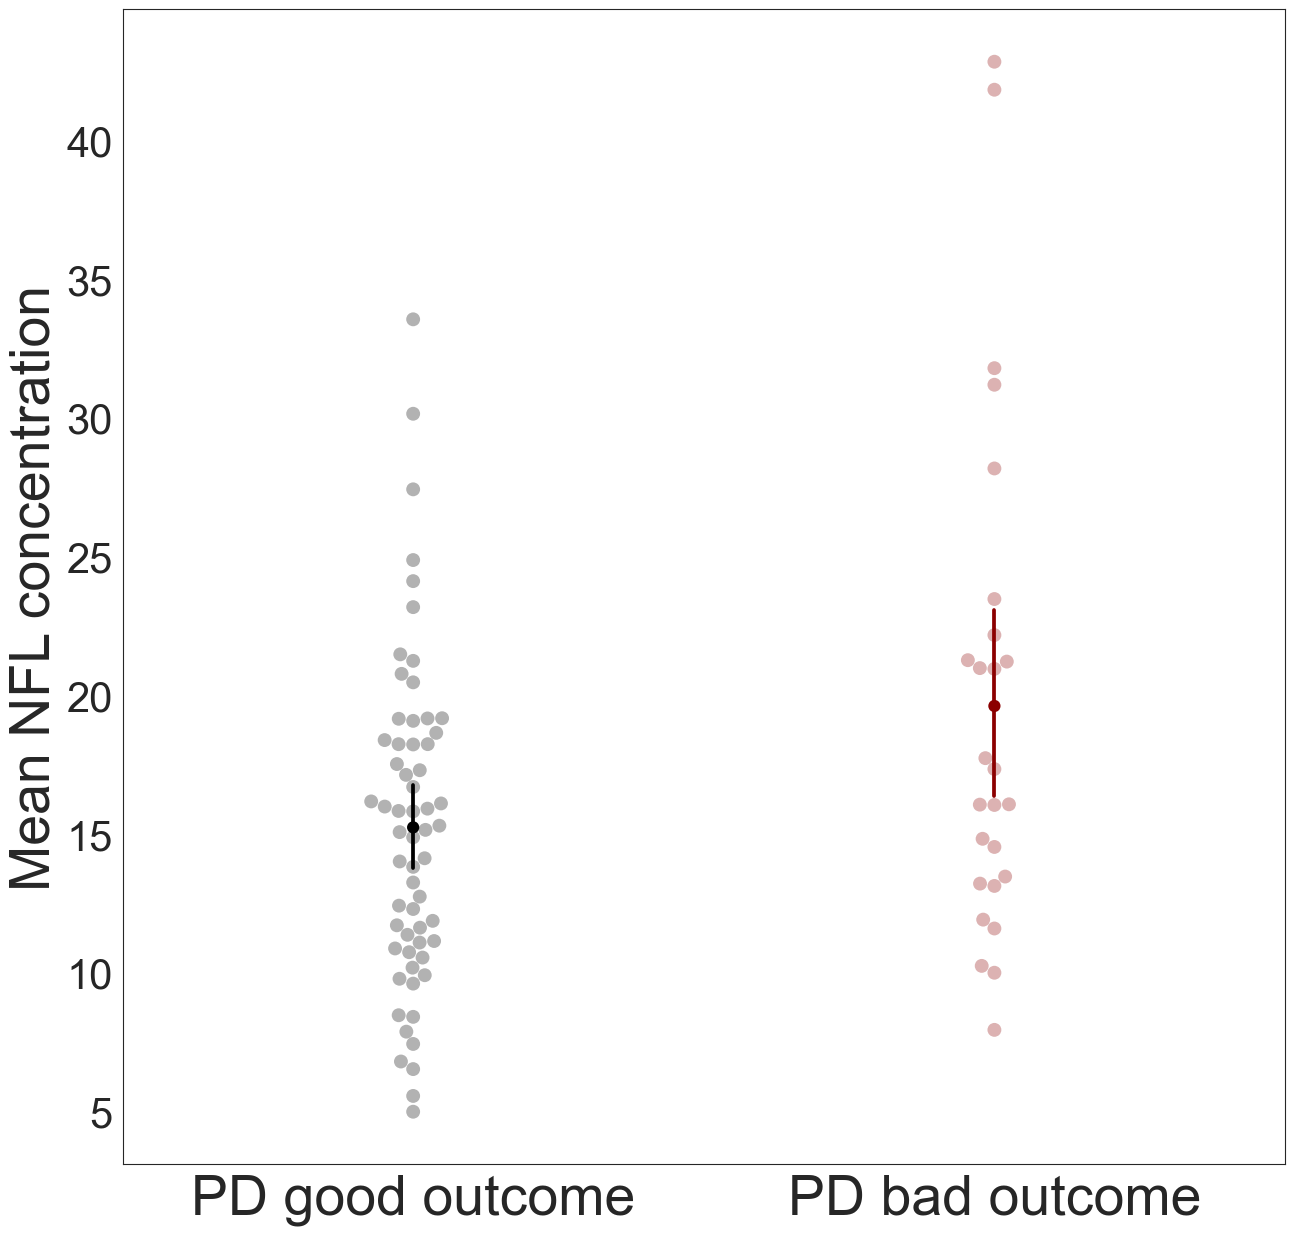

In [19]:
# Set style for the graphs
data = tau
# colors= ["gray", "black", "darkred"]

# for PD only
data = data[data.PD==1]
colors= ["black", "darkred"]

palette=sns.color_palette(colors)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(15,15))
sns.pointplot(x="MCIOrDementiaOrDeathOrFrailty", y="NFL_S2", data=data, join=False, palette=palette)
sns.swarmplot(x="MCIOrDementiaOrDeathOrFrailty", y="NFL_S2", data=data, alpha=0.3, palette=palette, dodge=False, size=10)
#### Make the labels pretty 
ax.set_xticklabels(["PD good outcome", "PD bad outcome"], fontsize=40)
# ax.set_xticklabels(["Controls", "PD normal cognition", "PD cognitive impairment"], fontsize=30)

plt.yticks(fontsize=30)
plt.xlabel(" ")
plt.ylabel("Mean NFL concentration", fontsize=40)
## Filename to save output
outname = str("RESULTS/figures/" + "_NFL_New_PDcognitiveImpairment.png")
# Save
plt.savefig(outname, dpi=300)

C:\Users\Angelika\Anaconda3\envs\GraphNew\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


SignificanceResult(statistic=-0.4426006169425952, pvalue=1.7667941601910553e-05)

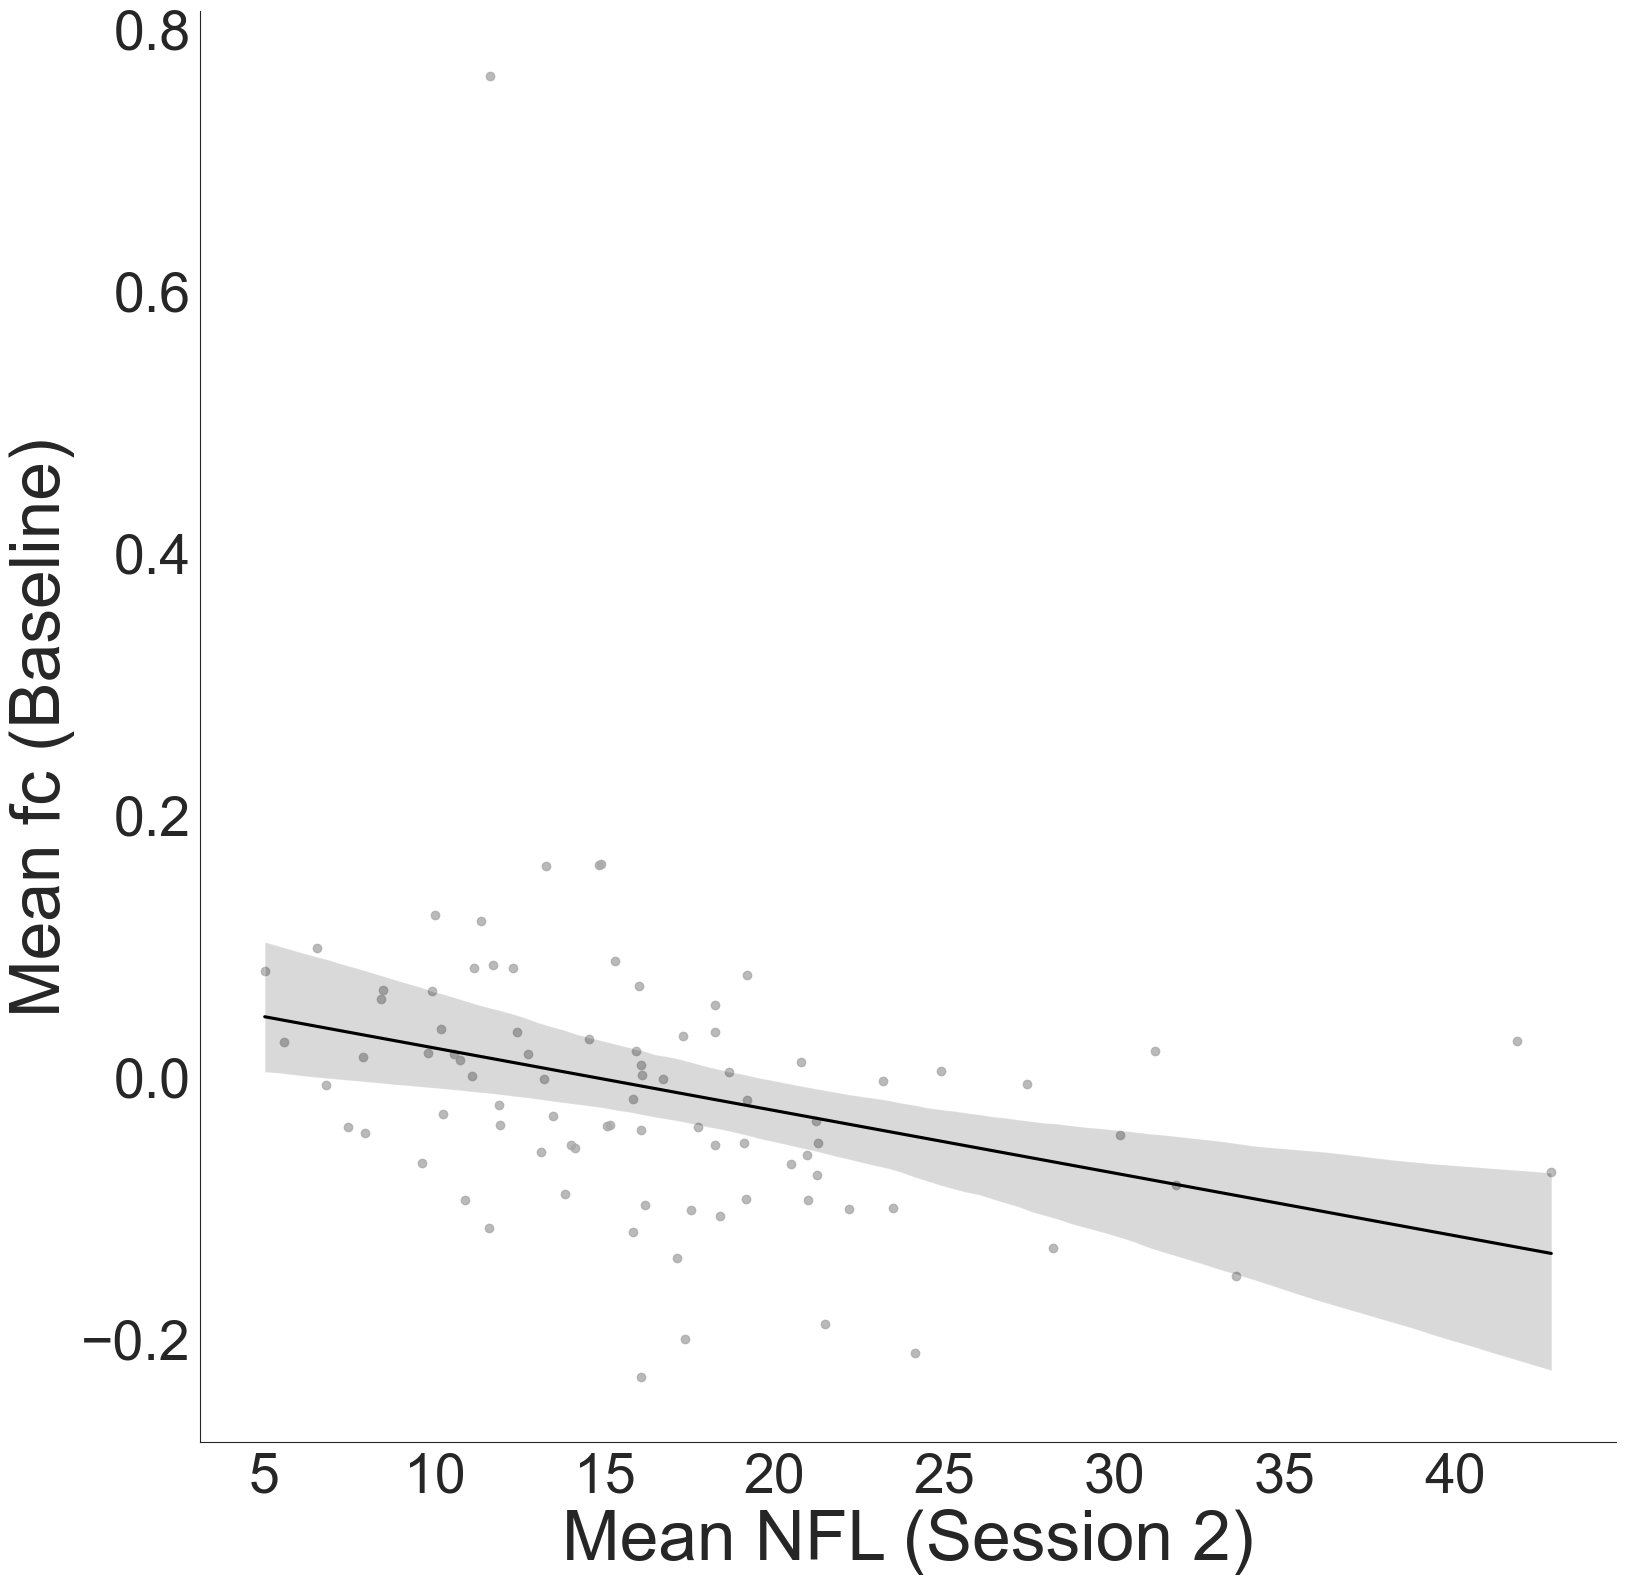

In [16]:
fc_template= pd.read_excel(r"C:\Users\Angelika\Dropbox\UCL\02_EXPERIMENTS\03_VIPD_Session3\DATA\ROIs\mean_fc_S1_PoorCognition.xlsx", header=None)
combined_data["MeanFC"] = fc_template[1]

roi = "NFL"
cog = "MeanFC"
data = combined_data[combined_data.PD==1]
# data = data[np.isfinite(data[cog])]
data = data[np.isfinite(data[roi])]
# data= data[data[cog] <0.6]
# Set style for the graphs
sns.set_style("white")
colors= ["black"]
palette=sns.color_palette(colors)
# fig, ax = plt.subplots(figsize=(15,15))
# fig = sns.regplot(x=roi, y=cog, data=data, color="darkgray", ci=0.95)
fig = sns.lmplot(x=roi, y=cog, data=data, scatter_kws={"color": "darkgray"}, line_kws={"color": "black"}, height=15, aspect=1)
# fig = sns.lmplot(x=cog, y=roi, data=data, hue="MCIOrDementiaOrDeathOrFrailty", palette=palette, height=15, aspect=1)
#### Make the labels pretty 
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel("Mean NFL (Session 2)", fontsize=50)
plt.ylabel("Mean fc (Baseline)", fontsize=50)
## Filename to save output
outname = str("RESULTS/figures/" + "NFL_New_MeanFC.png")
# Save
plt.savefig(outname, dpi=300)

stats.spearmanr(data[roi], data[cog])

SignificanceResult(statistic=-0.12754661069267811, pvalue=0.23091728192668914)

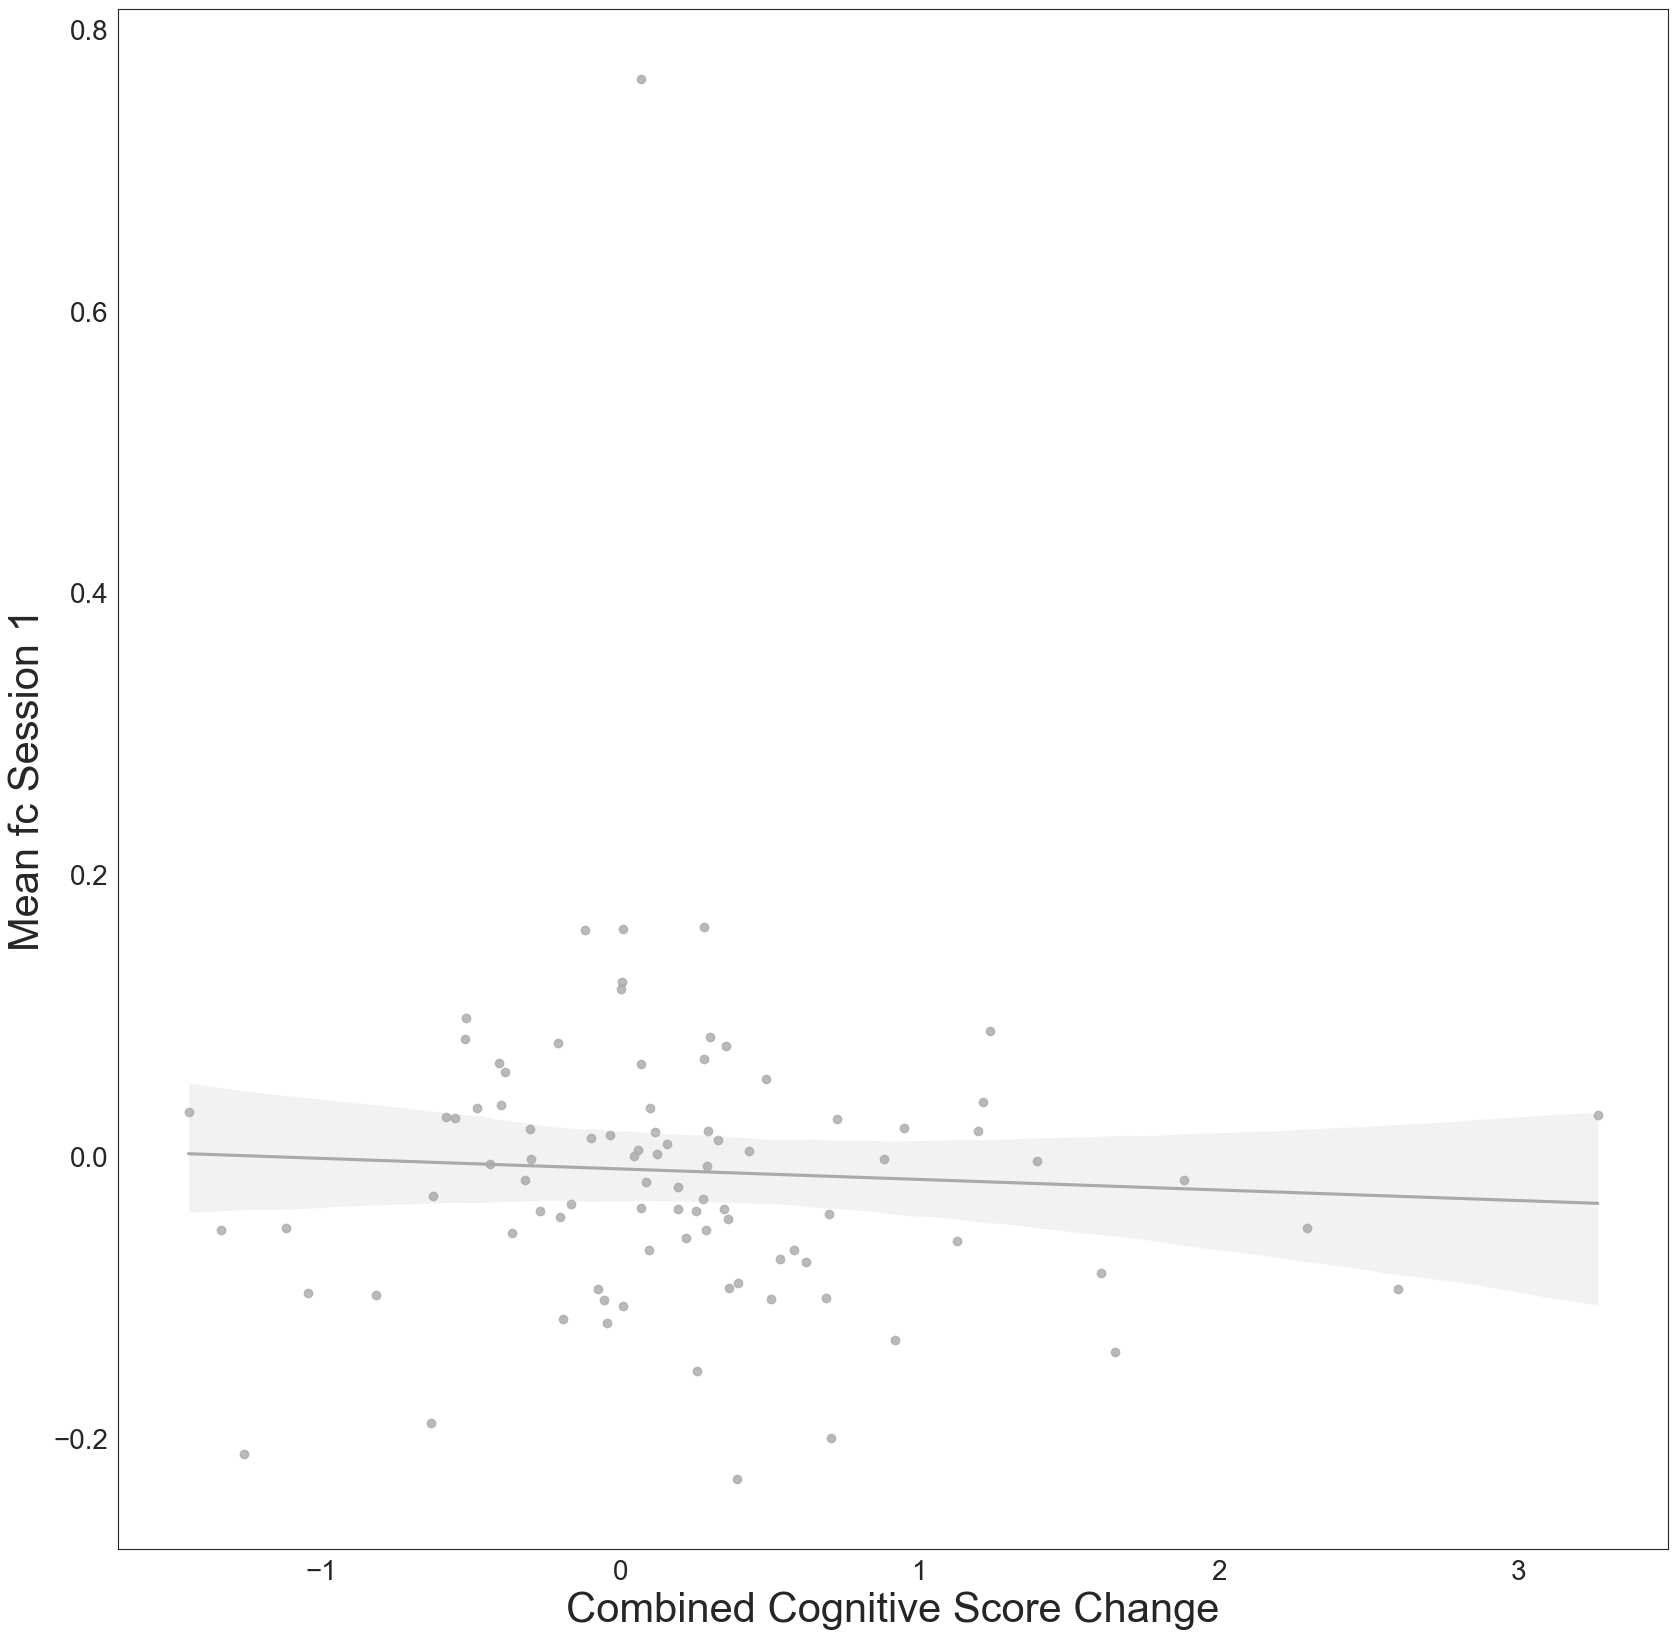

In [15]:
roi = "MeanFC"
cog = "ChangeCogComp"
data = combined_data[combined_data.PD==1]
data = data[np.isfinite(data[cog])]#
# data = data[data[roi] <0.6]
# Set style for the graphs
sns.set_style("white")
fig, ax = plt.subplots(figsize=(20,20))
fig = sns.regplot(x=cog, y=roi, data=data, color="darkgray")
# fig = sns.lmplot(x=cog, y=roi, data=data, hue="MCIOrDementiaOrDeathOrFrailty", palette=palette, height=15, aspect=1)
#### Make the labels pretty 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Combined Cognitive Score Change", fontsize=30)
plt.ylabel("Mean fc Session 1", fontsize=30)
## Filename to save output
# outname = str("RESULTS/figures/" + "CogScoreChange_FC.png")
# Save
plt.savefig(outname, dpi=300)

stats.spearmanr(data[roi], data[cog])

In [36]:
# FDR correct the p-values
pvalues = pd.read_csv(r"C:\Users\Angelika\Dropbox\UCL\02_EXPERIMENTS\03_VIPD_Session3\list.txt", header=None)
pvalues = pvalues[0].values
FDR = sm.stats.multipletests(pvalues, is_sorted=False, alpha=0.05, method="fdr_bh", returnsorted=False)
np.savetxt("outlist.txt", FDR[1])

#### Connectome analysis on the significant connectome

In [15]:
### Community Louvain algorithm
import bct as bct

def module_detection(path_averageConnectome, g, iterations):
        vectors = []
        qstats = []
        # Run Louvain algorithm
        for i in range(iterations):
            df = pd.read_csv(path_averageConnectome, header=None) 
            vector, qstat = bct.community_louvain(df.values, gamma=g)
            vectors.append(vector)
            qstats.append(qstat)
        # Construct agreement matrix
        qstats = np.array(qstats)
        vectors = np.array(vectors)
        vectors = np.moveaxis(vectors, 0, -1)
        agr_matrix = bct.agreement(vectors, buffsz=150)
        agr_matrix = bct.normalize(agr_matrix)
        # Consensus approach
        cons_matrix = bct.consensus_und(agr_matrix, 0.5, 100)
        return(cons_matrix, vectors)

In [12]:
# Calculate the group average connectome for all PD participants
from pathlib import Path

All=original_S1_data[(original_S1_data.PD==1) & (original_S1_data.Participant != "VIPD_125")].Participant.values

array = np.zeros((379, 379))
data_folder = Path(r"C:/Users/Angelika/Dropbox/UCL/02_EXPERIMENTS/03_VIPD_Session3/DATA/CONNECTOMES/S1/")

for i in range(0, len(All)):
    path = data_folder / All[i] / "connectome_norm.csv"
    data = pd.read_csv(path, header=None, sep=" ")
    array = array + data
array = array / len(All)
np.savetxt("DATA/CONNECTOMES/S1/Average/Average_Connectome.csv", array, delimiter=",")

In [81]:
# Run Louvain algorith

x,y = module_detection(r"DATA/CONNECTOMES/S1/Average/Average_Connectome.csv", 1.0, 1000)
np.savetxt("DATA/NBS/ModuleAllocations.txt", x, delimiter=",")
np.savetxt("DATA/NBS./Louvain_vectors.txt", y, delimiter= ",")

In [26]:
connectome =pd.read_csv(r"DATA/NBS/GLASSER/PoorCognition_t3.0.txt", delimiter=" ", header=None)
allocations = pd.read_csv(r"DATA/NBS/ModuleAllocations_Cortical.txt", header=None)
coordinates = pd.read_csv(r"DATA/NBS/GLASSER/Glasser_coordinates.txt", delimiter='\t', header=None)

In [27]:
## cortex only: 
cols = list(range(0,360))
connectome = connectome[:360]
connectome = connectome[cols]
## Get the columns and indeces were non zero
x,y = np.where(connectome == np.max(connectome.values))
edges = np.dstack((x,y))
for i in range(360):
    edges[edges==i] = allocations.iloc[i]
idx_to_label = {1: 'R temporo-occipital', 2: 'R fronto-parietal', 3: 'R parietal', 4: 'L occipital', 
                5: 'L frontal', 6: 'L parietal', }

In [77]:
module1 = allocations[allocations[0] ==1].index
module2 = allocations[allocations[0] ==2].index
module3 = allocations[allocations[0] ==3].index
module4 = allocations[allocations[0] ==4].index
module5 = allocations[allocations[0] ==5].index
module6 = allocations[allocations[0] ==6].index
modules = [module1, module2, module3, module4, module5, module6]
    
sum_connectome = pd.DataFrame(data=np.zeros((6,6)))
for i in range(6):
    matrix = pd.DataFrame(connectome, index=modules[i])
    for k in range(6):
        sum_connectome[i].iloc[k] = matrix[modules[k]].values.sum()
sum_connectome.columns = idx_to_label.values()

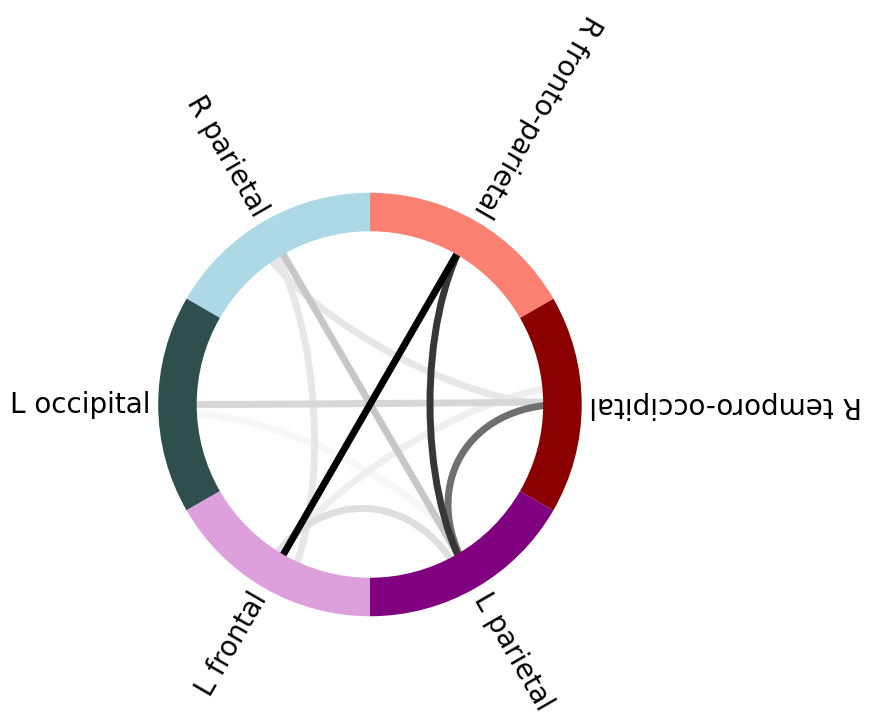

In [96]:
import mne.viz as mne
from mne_connectivity.viz import plot_connectivity_circle
node_colors = ["darkred", "salmon", "lightblue", "darkslategrey", "plum", "purple"]
fig, axes = plot_connectivity_circle(sum_connectome.values, node_names = sum_connectome.columns, node_linewidth=0,
    colormap='gist_yarg', facecolor='white', textcolor='black', colorbar=False, linewidth=5, fontsize_names=20, node_height=2, node_colors=node_colors)

#### NOISE

In [28]:
### Noise
noise = pd.read_csv(r"C:\Users\Angelika\Dropbox\UCL\02_EXPERIMENTS\03_VIPD_Session3\DATA\Noise.csv")
clinical = original_S1_data
noise_df = pd.merge(noise, clinical, on="Participant")

In [76]:
## Quality measures
#### Structural scans: cjv, efc, cnr, tsnr, fber
#### Functional scnas: mean fd 

from scikit_posthocs import posthoc_dunn
variable = "fber"
data = noise_df[np.isfinite(noise_df[variable])]
# data = noise_df[noise_df.fMRIincluded ==1] # for fMRI metrics
stats.kruskal(data.MCIOrDementiaOrDeathOrFrailty, data[variable])

KruskalResult(statistic=184.907402988255, pvalue=4.111617894279953e-42)

In [77]:
posthoc_dunn(data, val_col=variable, group_col="MCIOrDementiaOrDeathOrFrailty")

,0,1,2
0,1.000000,0.552247,0.248325
1,0.552247,1.000000,0.441009
2,0.248325,0.441009,1.000000


In [109]:
# Post hoc tukey test for ANOVA 
from statsmodels.formula.api import ols
variable = "efc"

data = noise_df
data = noise_df[np.isfinite(noise_df[variable])]

# variable = data[variable]
# group = data.MCIOrDementiaOrDeathOrFrailty
anova = ols(variable + " ~ MCIOrDementiaOrDeathOrFrailty", data=data).fit()  
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    efc   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     3.085
Date:                Mon, 31 Jul 2023   Prob (F-statistic):             0.0816
Time:                        14:27:26   Log-Likelihood:                 288.02
No. Observations:                 121   AIC:                            -572.0
Df Residuals:                     119   BIC:                            -566.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.5878      0.004    161.097      0.000       0.581       0.595
MCIOrDementiaOrDeathOrFrailty     0.0053      0.003      1.757      0.082      -0.001       0.011
==============================================================================
Omnibus:                        4.150   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                2.352
Skew:                          -0.060   Prob(JB):                        0.309
Kurtosis:                       2.328   Cond. No.                         3.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(data[variable], data.MCIOrDementiaOrDeathOrFrailty))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0077 0.2912 -0.0044 0.0199  False
     0      2   0.0106 0.1906 -0.0038  0.025  False
     1      2   0.0029 0.8396 -0.0093  0.015  False
---------------------------------------------------


In [74]:
groupdf = data[[variable, "MCIOrDementiaOrDeathOrFrailty"]]
groupdf.groupby("MCIOrDementiaOrDeathOrFrailty").mean()[variable], groupdf.groupby("MCIOrDementiaOrDeathOrFrailty").std()[variable]

(MCIOrDementiaOrDeathOrFrailty
 0    135.497489
 1    131.120843
 2    127.578778
 Name: fber, dtype: float64,
 MCIOrDementiaOrDeathOrFrailty
 0    28.033362
 1    25.504710
 2    24.412177
 Name: fber, dtype: float64)

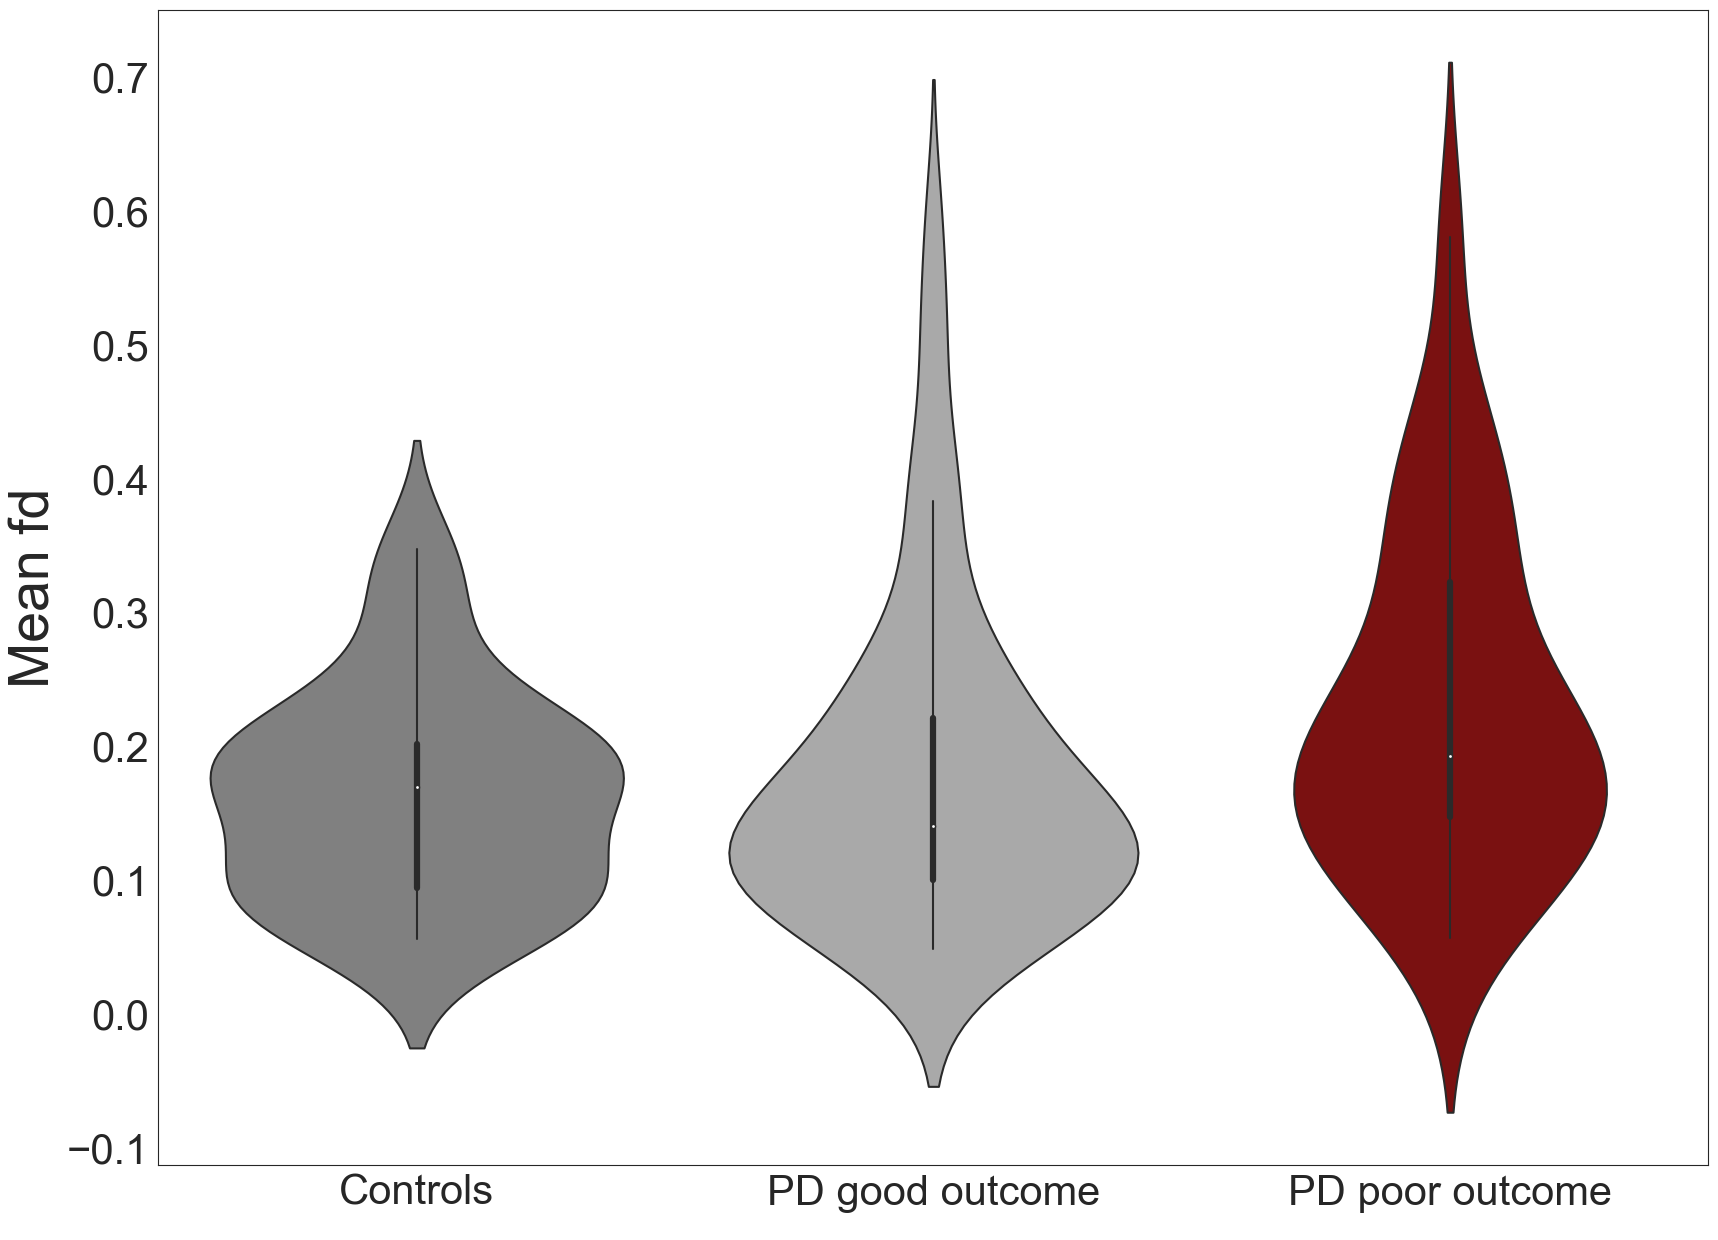

In [53]:
# Set style for the graphs
data = noise_df
variable = "fd_mean"
colors= ["gray", "darkgray", "darkred"]

# # for PD only
# data = data[data.PD==1
# colors= ["black", "darkred"]

palette=sns.color_palette(colors)
sns.set_style("white")
fig, ax = plt.subplots(figsize=(20,15))
sns.violinplot(x="MCIOrDementiaOrDeathOrFrailty", y=variable, data=data, palette=palette)
# sns.swarmplot(x="MCIOrDementiaOrDeathOrFrailty", y="pTau", data=data, alpha=0.3, palette=palette, dodge=True, size=10)
#### Make the labels pretty 
# ax.set_xticklabels(["PD good outcome", "PD bad outcome"], fontsize=40)
ax.set_xticklabels(["Controls", "PD good outcome", "PD poor outcome"], fontsize=30)

plt.yticks(fontsize=30)
plt.xlabel(" ")
plt.ylabel("Mean fd", fontsize=40)
## Filename to save output
outname = str("RESULTS/figures/" + variable + ".png")
# Save
plt.savefig(outname, dpi=300)